In [1]:
!pip install mlflow==2.16.0
!pip install mlflow-skinny==2.16.0

## Import necessary libs

In [52]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import mlflow

In [3]:

# Define the file path
file_path = "../../data/raw/02_Used_Car_Prices.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows
df


,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,1774000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,475000.0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,400000.0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,290000.0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,265000.0


Basic EDA

In [4]:
df.isnull().sum()


Brand_Model           0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price (INR Lakhs)     0
dtype: int64

In [5]:
df.describe()


,Year,Kilometers_Driven,Seats,Price (INR Lakhs)
count,6019.000000,6.019000e+03,5977.000000,6.019000e+03
mean,2013.358199,5.873838e+04,5.278735,9.479468e+05
std,3.269742,9.126884e+04,0.808840,1.118792e+06
min,1998.000000,1.710000e+02,0.000000,4.400000e+04
25%,2011.000000,3.400000e+04,5.000000,3.500000e+05
50%,2014.000000,5.300000e+04,5.000000,5.640000e+05
75%,2016.000000,7.300000e+04,5.000000,9.950000e+05
max,2019.000000,6.500000e+06,10.000000,1.600000e+07


In [6]:
df.dtypes


Brand_Model           object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price (INR Lakhs)    float64
dtype: object

In [7]:
df.duplicated().sum()


0

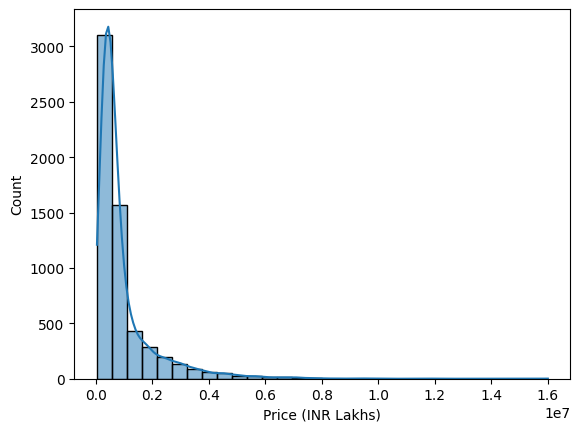

In [8]:
sns.histplot(df['Price (INR Lakhs)'], bins=30, kde=True)
plt.show()

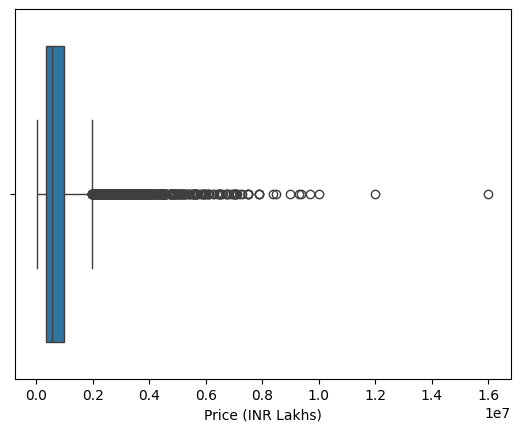

In [9]:
sns.boxplot(x=df['Price (INR Lakhs)'])
plt.show()

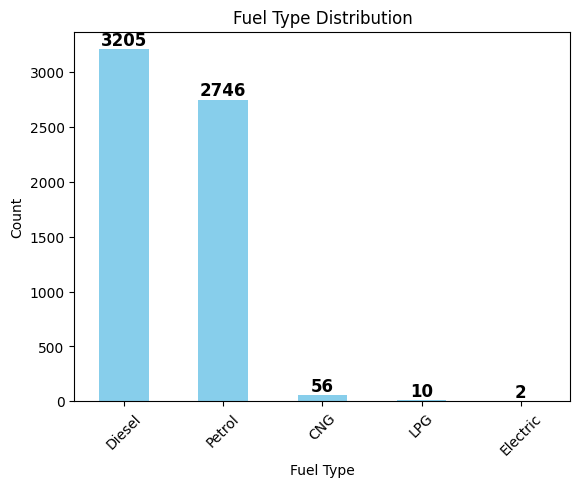

In [10]:
# Plot the bar chart
ax = df['Fuel_Type'].value_counts().plot(kind='bar', color='skyblue')

# Add text above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

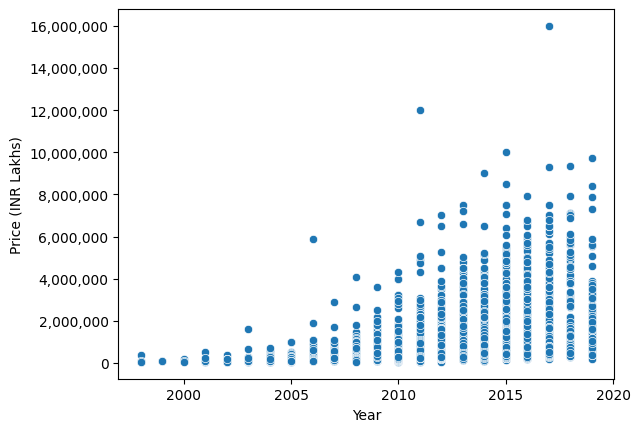

In [11]:
# Scatter plot
sns.scatterplot(x=df['Year'], y=df['Price (INR Lakhs)'])

# Set the y-axis formatter to display normal numbers using mticker
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

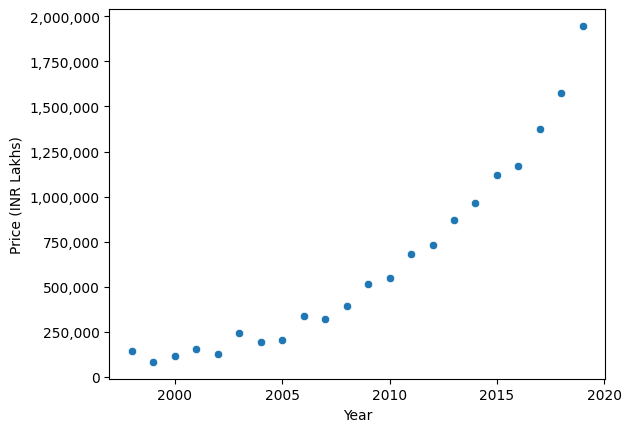

In [12]:
# Grouping by Year and calculating the average sale price
average_price_per_year = df.groupby('Year')['Price (INR Lakhs)'].mean().reset_index()

# Scatter plot of average price per year
sns.scatterplot(x=average_price_per_year['Year'], y=average_price_per_year['Price (INR Lakhs)'])

# Set the y-axis formatter to display normal numbers using mticker
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


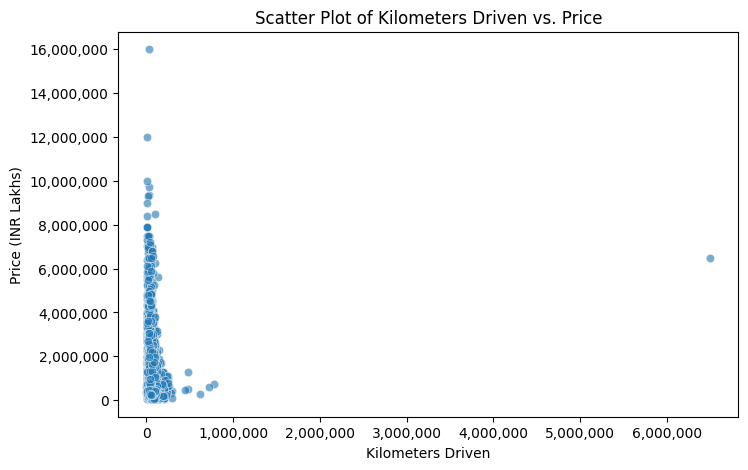

In [13]:


# Create scatter plot
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=df['Kilometers_Driven'], y=df['Price (INR Lakhs)'], alpha=0.6)

# Format x-axis and y-axis to show normal numbers
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Adds commas instead of scientific notation
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Formats y-axis the same way

# Labels and title
plt.xlabel("Kilometers Driven")
plt.ylabel("Price (INR Lakhs)")
plt.title("Scatter Plot of Kilometers Driven vs. Price")

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17252\1835998595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df['Fuel_Type'], y=df['Price (INR Lakhs)'], palette='Set2')


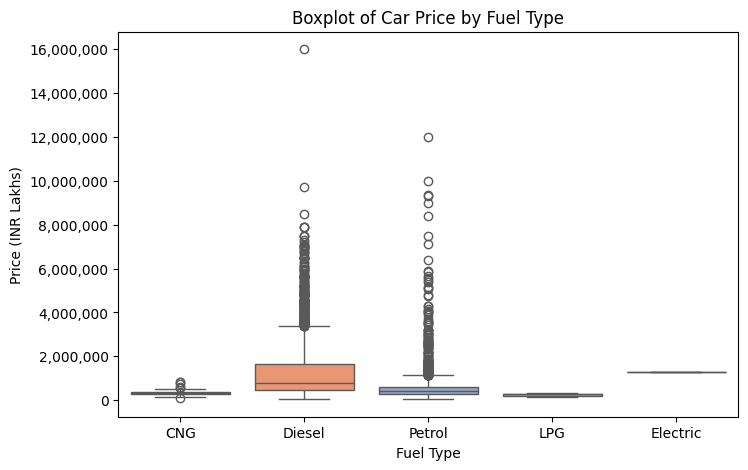

In [14]:

# Create boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=df['Fuel_Type'], y=df['Price (INR Lakhs)'], palette='Set2')

# Format the y-axis to show normal numbers
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Formats y-axis without scientific notation

# Labels and title
plt.xlabel("Fuel Type")
plt.ylabel("Price (INR Lakhs)")
plt.title("Boxplot of Car Price by Fuel Type")

plt.show()

Manual data cleaning for further eda

In [15]:
# Drop all rows with any null values
df = df.dropna()

# Verify the result
print(df.isnull().sum())

Brand_Model          0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price (INR Lakhs)    0
dtype: int64


There is a "null bhp" we need to take node of here

In [16]:
df['Power'].unique()


array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [17]:
# Check and filter rows where 'Power' is 'null bhp'
df = df[df['Power'] != 'null bhp']


In [18]:

df['Engine'] = df['Engine'].astype(str).str.replace(' CC', '').astype(float)

df['Power'] = df['Power'].astype(str).str.replace('bhp', '').astype(float)



In [19]:
df['Mileage'] = df['Mileage'].str.extract(r'([\d\.]+)').astype(float)


Engine and power have high multicolinearity. Hence one col will be dropped


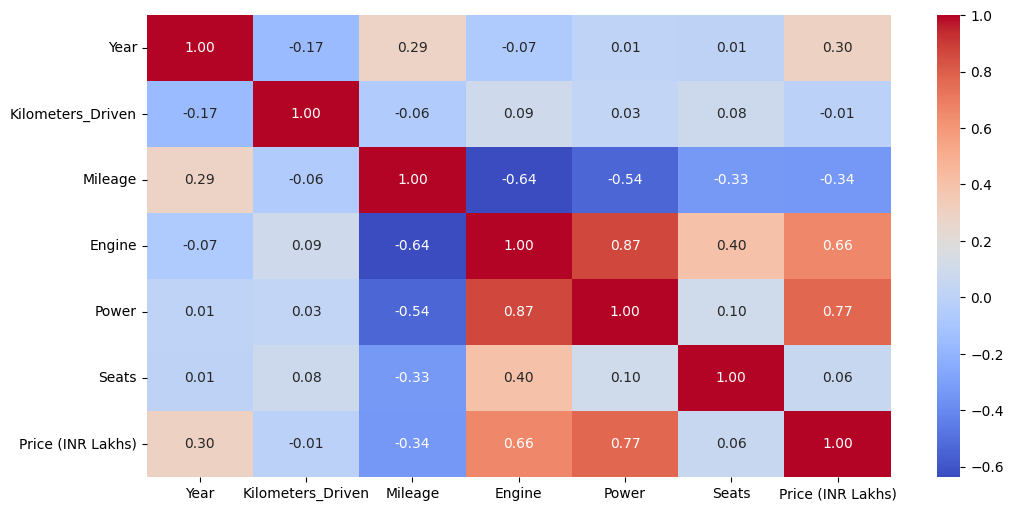

In [20]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns only
corr = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

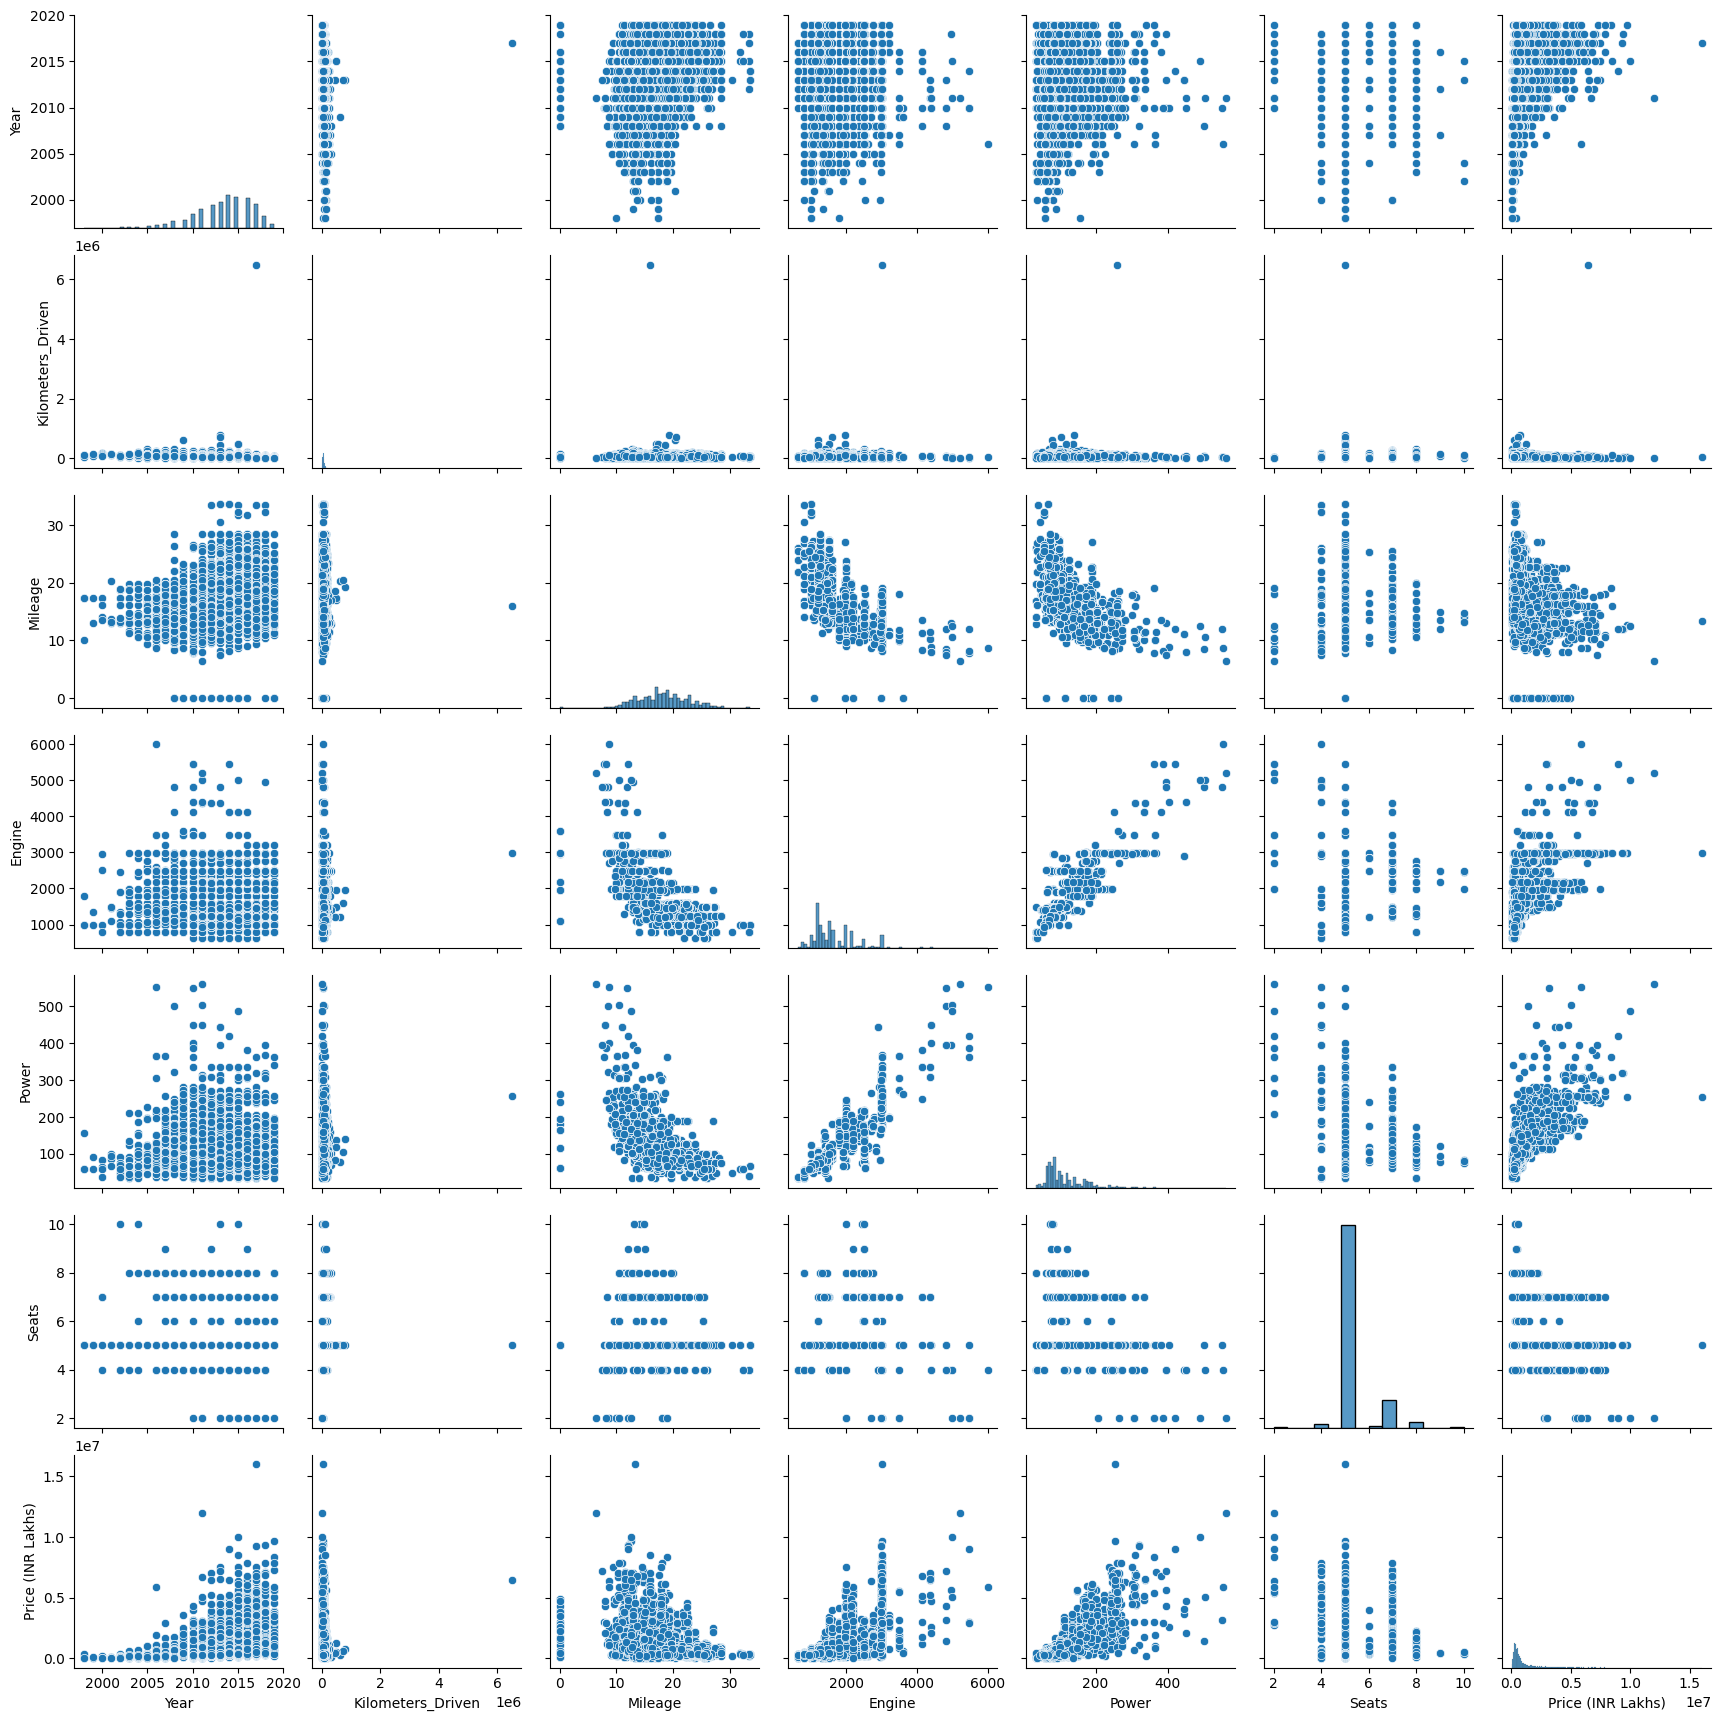

In [21]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create the pairplot
sns.pairplot(df[numerical_cols])

# Show the plot
plt.show()

Change to Brand as brand model is too unique

In [22]:
df['Brand_Model'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [23]:
# Extract the first word from the 'Brand_Model' column
df['Brand'] = df['Brand_Model'].str.split().str[0]

# Drop the old 'Brand_Model' column
df = df.drop(columns=['Brand_Model'])


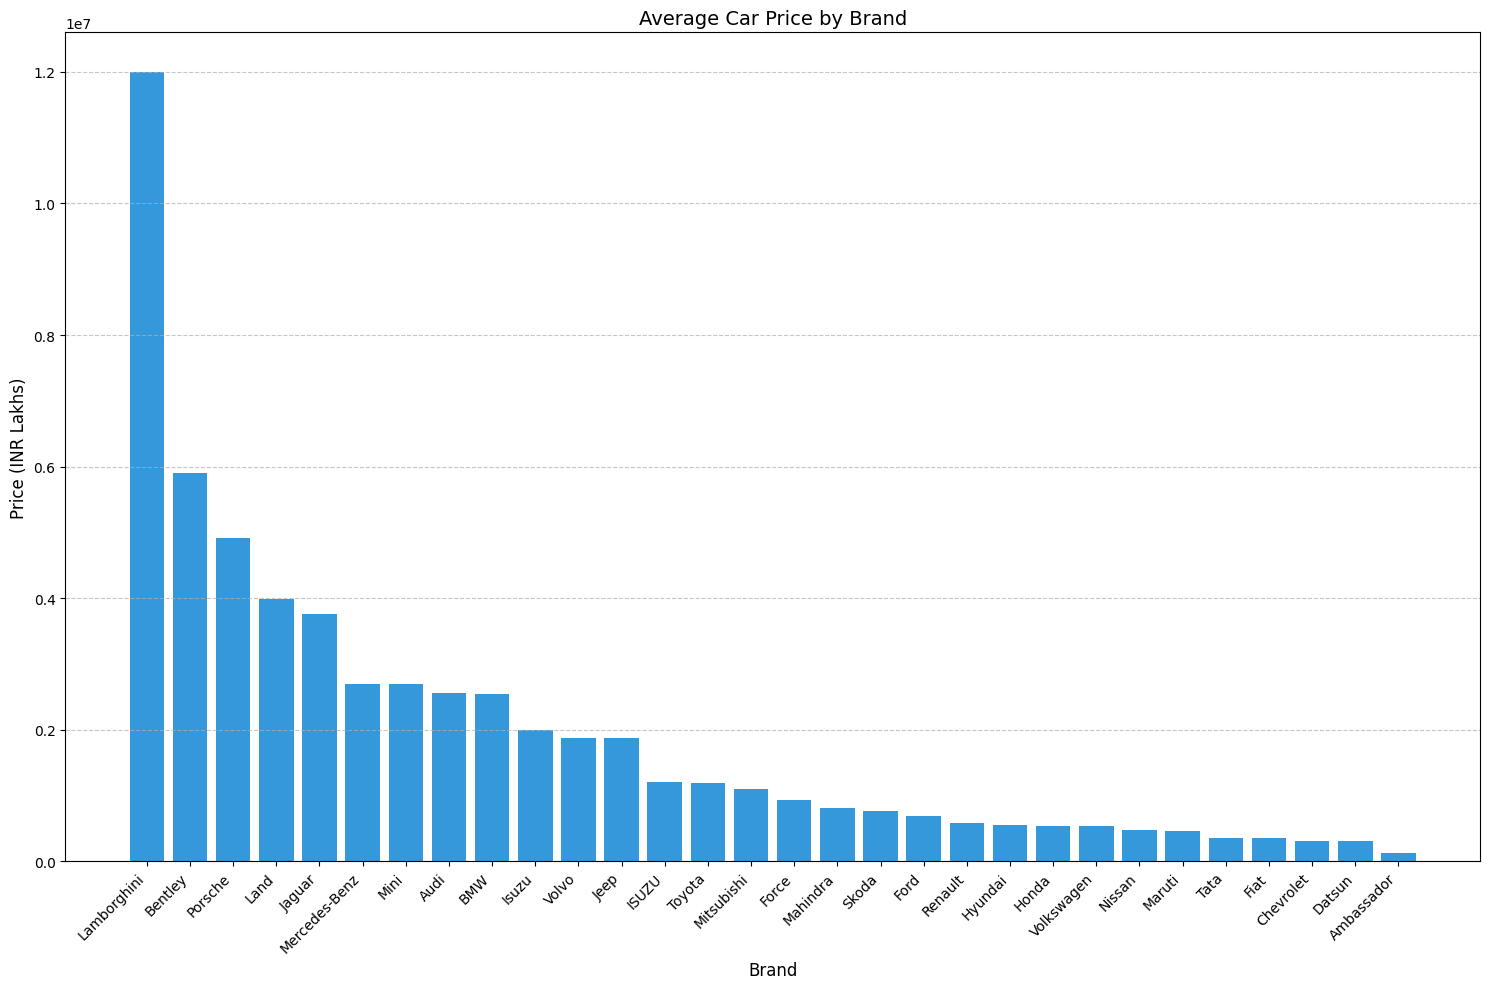

In [24]:
# Calculate average price by brand
avg_prices = df.groupby('Brand')['Price (INR Lakhs)'].mean().reset_index()
avg_prices = avg_prices.sort_values('Price (INR Lakhs)', ascending=False)

# Create a clean, focused bar chart
plt.figure(figsize=(15,10 ))
bars = plt.bar(avg_prices['Brand'], avg_prices['Price (INR Lakhs)'], color='#3498db')
plt.title('Average Car Price by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price (INR Lakhs)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Add value labels on top of each bar
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
#             f'{height:.2f}',
#             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [25]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs),Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,475000.0,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,400000.0,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,290000.0,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,265000.0,Maruti


In [26]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
list(categorical_features)
print(categorical_features)


Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], dtype='object')


In [27]:
numeric_features = df.select_dtypes(include=['number']).columns
print(list(numeric_features))


['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price (INR Lakhs)']


In [28]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [29]:
unseen_test = df.tail(5)  # Take last 5 rows as unseen data
df = df.iloc[:-5]  # Remove last 5 rows from training data


# Pycaret


In [30]:
# Check for negative or zero values in the target column
df['Price (INR Lakhs)'].min()


44000.0

In [31]:
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

Tried with polynomial_features=true and False. when true, best r2 = 87%. wheh it is false it performs better

In [32]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs),Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6009,Mumbai,2015,33500,Petrol,Automatic,First,19.16,2494.0,158.20,5.0,1975000.0,Toyota
6010,Delhi,2013,33746,Petrol,Manual,First,18.50,1198.0,86.80,5.0,320000.0,Honda
6011,Hyderabad,2009,53000,Petrol,Automatic,First,0.00,3597.0,262.60,5.0,475000.0,Skoda
6012,Coimbatore,2011,45004,Diesel,Manual,First,12.80,2494.0,102.00,7.0,948000.0,Toyota


In [33]:
df['Price (INR Lakhs)'].describe() 

count    5.867000e+03
mean     9.609240e+05
std      1.125274e+06
min      4.400000e+04
25%      3.525000e+05
50%      5.750000e+05
75%      1.002500e+06
max      1.600000e+07
Name: Price (INR Lakhs), dtype: float64

In [34]:
numeric_features_list = df.select_dtypes(include=np.number).columns.tolist()
categorical_features_list = ['Brand', 'Location', 'Fuel_Type', 'Transmission']
ordinal_features_list = ['Owner_Type']
numeric_features_list = [i for i in numeric_features_list if i not in categorical_features_list + ordinal_features_list + ['Price (INR Lakhs)']]



exp1 = setup(df,
             transformation_method='quantile', #yeo-johnson gives error
             target='Price (INR Lakhs)',
             session_id=123,
             log_experiment=True,
             remove_outliers=True,
             normalize=True,
             normalize_method='zscore',
             numeric_features = numeric_features_list,
             categorical_features=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'],
             transformation=True,
             transform_target=True,
             transform_target_method='quantile',
             ordinal_features = {'Owner_Type': ['First', 'Second', 'Third', 'Fourth & Above']},
             numeric_imputation='mean',
             remove_multicollinearity=True, # Remove multicollinearity
             multicollinearity_threshold=0.7, # Set threshold for multicollinearity
             rare_to_value = 0.1,
            
            )


,Description,Value
0,Session id,123
1,Target,Price (INR Lakhs)
2,Target type,Regression
3,Original data shape,"(5867, 12)"
4,Transformed data shape,"(5661, 23)"
5,Transformed train set shape,"(3900, 23)"
6,Transformed test set shape,"(1761, 23)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


In [35]:
pd.set_option('display.max_columns', None)

In [36]:
# Access X_train
X_train = get_config('X_train')

X_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
1102,Pune,2012,94900,Diesel,Manual,First,16.799999,1493.0,110.000000,5.0,Hyundai
4970,Hyderabad,2011,101999,Diesel,Automatic,First,16.730000,1995.0,218.000000,5.0,BMW
1171,Mumbai,2011,58000,Petrol,Manual,First,15.040000,1598.0,103.599998,5.0,Volkswagen
3335,Mumbai,2010,63298,Petrol,Automatic,First,14.530000,1794.0,138.100006,5.0,Toyota
706,Chennai,2017,34000,Diesel,Automatic,First,13.000000,2143.0,204.000000,5.0,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...
5351,Pune,2010,79000,Petrol,Manual,Third,16.469999,1198.0,73.900002,5.0,Volkswagen
4169,Kochi,2018,6279,Petrol,Manual,First,22.700001,799.0,53.639999,5.0,Datsun
1384,Mumbai,2016,62000,Petrol,Manual,First,18.500000,1197.0,85.800003,5.0,Maruti
3547,Kolkata,2016,12800,Petrol,Manual,First,19.440001,1198.0,67.000000,7.0,Datsun


In [37]:
transformed_target = get_config('y_transformed')
original_target = get_config('y')

print("Original target:")
print(original_target.describe())
print("\nTransformed target:")
print(transformed_target.describe())


Original target:
count        5867.0
mean       960924.0
std       1125274.0
min         44000.0
25%        352500.0
50%        575000.0
75%       1002500.0
max      16000000.0
Name: Price (INR Lakhs), dtype: float64

Transformed target:
count    5661.000000
mean        0.026505
std         0.988006
min        -5.199337
25%        -0.643374
50%         0.028859
75%         0.698142
max         5.199337
Name: Price (INR Lakhs), dtype: float64


train over 5 folds

In [39]:
# compare baseline models
best = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,161482.4899,176663243180.1417,399382.4122,0.8737,0.2205,0.1659,0.5450
lightgbm,Light Gradient Boosting Machine,166771.3072,178317561552.0991,406151.0860,0.8701,0.2286,0.1728,0.4000
rf,Random Forest Regressor,169869.7950,198203225605.0781,429871.8972,0.8539,0.2369,0.1777,0.2240
xgboost,Extreme Gradient Boosting,167708.8234,201644983091.2000,432819.9156,0.8523,0.2372,0.1732,0.1020
gbr,Gradient Boosting Regressor,193091.7406,204859529760.0604,439428.7322,0.8496,0.2553,0.1976,0.1320
et,Extra Trees Regressor,171449.4476,217309065400.3377,447033.9084,0.8415,0.2418,0.1810,0.2030
dt,Decision Tree Regressor,224389.8066,322890232656.7746,552764.8226,0.7520,0.3217,0.2449,0.0820
knn,K Neighbors Regressor,273370.2016,392584331264.0000,611529.4156,0.7157,0.3731,0.2968,0.0810
ada,AdaBoost Regressor,269945.0274,390146608821.5106,605113.0758,0.7082,0.3553,0.2832,0.1090
br,Bayesian Ridge,278272.6950,465027652519.7059,674425.5592,0.6278,0.3459,0.2890,0.0980


2025/02/26 00:44:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 00:44:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 00:44:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 00:44:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 00:44:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 00:44:50 

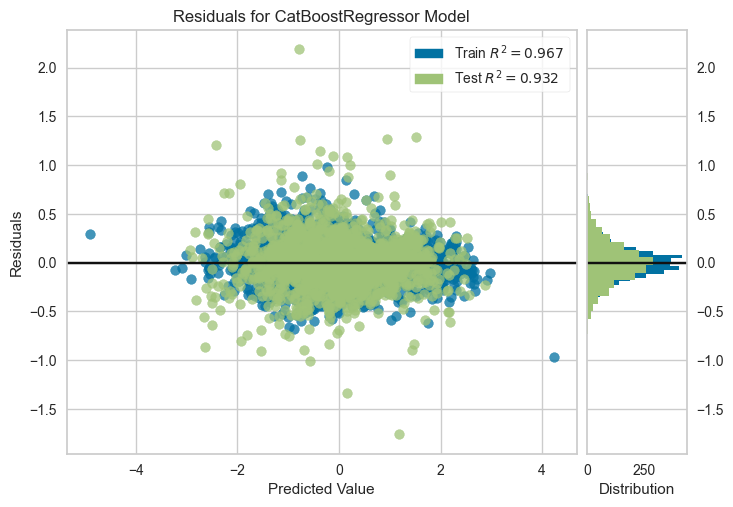

In [40]:
# plot residuals
plot_model(best, plot = 'residuals')

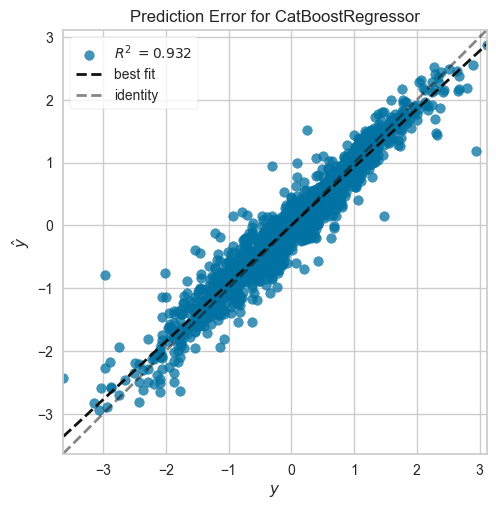

In [41]:
# plot error
plot_model(best, plot = 'error')

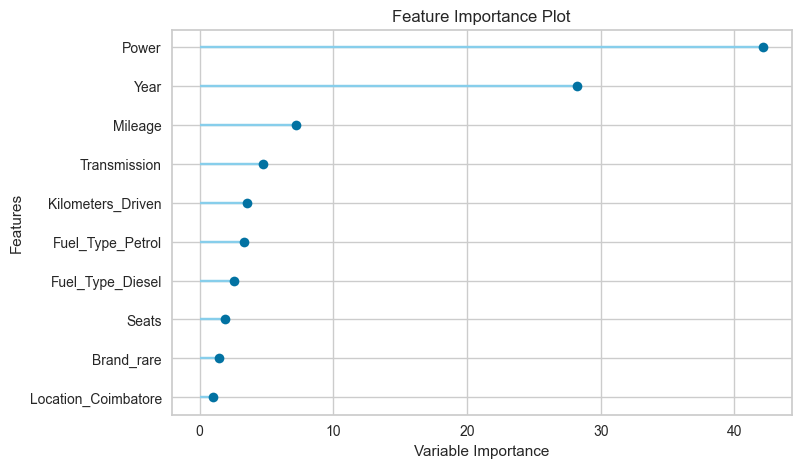

In [42]:
# plot feature importance
plot_model(best, plot = 'feature')

In [43]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

get indepth into the train splits

In [44]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,159029.6273,89814875319.7314,299691.3000,0.9340,0.2115,0.1533
1,151895.1649,84912848550.3574,291398.0929,0.9280,0.2072,0.1593
2,199735.7887,426986621991.6066,653442.1336,0.7623,0.2361,0.1554
3,162236.1597,363934138643.1238,603269.5406,0.7842,0.2040,0.1477
4,126474.6976,54945310849.9690,234404.1613,0.9214,0.2119,0.1615
5,163322.6106,114923924121.4534,339004.3128,0.9208,0.2138,0.1604
6,164217.3310,239086307209.8641,488964.5255,0.7859,0.2787,0.2417
7,161623.5009,143427523195.0035,378718.2636,0.9039,0.1989,0.1507
8,169529.3653,118477464197.8040,344205.5552,0.9054,0.2285,0.1656


2025/02/26 00:45:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Set the input example

In [56]:
X_transformed = get_config('X_transformed')
X_transformed

,Location_Pune,Location_Hyderabad,Location_Mumbai,Location_rare,Location_Kochi,Location_Coimbatore,Year,Kilometers_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,...,Owner_Type_0.0,Owner_Type_-1.0,Owner_Type_1.0,Mileage,Power,Seats,Brand_Hyundai,Brand_rare,Brand_Maruti,Brand_Honda
1102,3.116775,-0.371513,-0.377743,-0.895201,-0.349255,-0.346012,-0.556206,1.313509,0.905472,-0.894737,...,0.402614,-0.039253,-0.400030,-0.385640,0.300123,-0.274455,2.119660,-1.049965,-0.494786,-0.327606
4970,-0.320844,2.691699,-0.377743,-0.895201,-0.349255,-0.346012,-0.812055,1.460560,0.905472,-0.894737,...,0.402614,-0.039253,-0.400030,-0.407783,1.655598,-0.274455,-0.471774,0.952413,-0.494786,-0.327606
1171,-0.320844,-0.371513,2.647303,-0.895201,-0.349255,-0.346012,-0.812055,0.209104,-1.104397,1.117647,...,0.402614,-0.039253,-0.400030,-0.737789,0.216793,-0.274455,-0.471774,0.952413,-0.494786,-0.327606
3335,-0.320844,-0.371513,2.647303,-0.895201,-0.349255,-0.346012,-1.068993,0.391236,-1.104397,1.117647,...,0.402614,-0.039253,-0.400030,-0.845070,0.661197,-0.274455,-0.471774,0.952413,-0.494786,-0.327606
706,-0.320844,-0.371513,-0.377743,1.117067,-0.349255,-0.346012,0.968482,-0.636870,0.905472,-0.894737,...,0.402614,-0.039253,-0.400030,-1.112088,1.598073,-0.274455,-0.471774,0.952413,-0.494786,-0.327606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,-0.320844,-0.371513,-0.377743,1.117067,-0.349255,-0.346012,-1.690439,0.279954,-1.104397,1.117647,...,-2.483771,-0.039253,2.499814,-0.030238,-1.512798,-0.274455,-0.471774,-1.049965,2.021075,-0.327606
6005,3.116775,-0.371513,-0.377743,-0.895201,-0.349255,-0.346012,0.586108,-0.516742,0.905472,-0.894737,...,0.402614,-0.039253,-0.400030,1.309225,-0.191320,-0.274455,-0.471774,-1.049965,2.021075,-0.327606
2771,-0.320844,-0.371513,-0.377743,1.117067,-0.349255,-0.346012,-0.812055,0.102785,0.905472,-0.894737,...,0.402614,-0.039253,-0.400030,-0.430784,0.509039,-0.274455,-0.471774,0.952413,-0.494786,-0.327606
2752,-0.320844,-0.371513,-0.377743,1.117067,-0.349255,-0.346012,0.968482,0.279954,-1.104397,1.117647,...,0.402614,-0.039253,-0.400030,0.640485,-1.774593,-0.274455,2.119660,-1.049965,-0.494786,-0.327606


In [57]:
# Assuming 'model' is your trained model and 'X' is a sample input
input_example = X_transformed.iloc[:5]  # Use the first 5 rows of your input data as an example

mlflow.sklearn.log_model(
    cb,
    "model",
    input_example=input_example,
    signature=mlflow.models.infer_signature(X_transformed, cb.predict(X_transformed))
)

In [51]:
# cb_results = pull()
# # print(type(cb_results))
# cb_results

In [46]:
# to access the tuner object you can set return_tuner = True
tuned_cb, tuner = tune_model(cb, return_tuner=True, optimize = 'RMSE', search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,161279.7659,104623816691.5083,323456.0506,0.9232,0.2173,0.1574
1,162587.7409,123837591676.0194,351905.6574,0.8950,0.2138,0.1632
2,202614.3081,487667668602.7473,698332.0618,0.7285,0.2546,0.1575
3,166159.0160,389866810970.3347,624393.1542,0.7688,0.2151,0.1541
4,125915.4456,60806411956.2840,246589.5617,0.9130,0.2131,0.1565
5,173366.8213,161223100185.2562,401525.9645,0.8889,0.2273,0.1645
6,160629.1147,227329130755.4044,476790.4474,0.7964,0.2798,0.2320
7,175024.2915,190848794695.4010,436862.4437,0.8721,0.2124,0.1606
8,167799.3901,149384612369.0620,386503.0561,0.8808,0.2276,0.1680


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2025/02/26 00:47:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Original performed the best, hence will use back best. 

And we will use backt the model evaluation above

In [47]:
tuned_cb

In [48]:
tuner

OptunaSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
               error_score='raise',
               estimator=Pipeline(memory=Memory(location=None),
                                  steps=[('target_transformation',
                                          TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                                                    random_state=123)))),
                                         ('numerical_imputer',
                                          TransformerWrapper(i...
                                    'actual_estimator__l2_leaf_reg': IntDistribution(high=200, log=True, low=1, step=1),
                                    'actual_estimator__n_estimators': IntDistribution(high=300, log=False, low=10, step=1),
                                    'actual_estimator__random_strength': FloatDistribution(high=0.8, log=False, low=0.0, step=None)},
               random_state=123, refit=False,
               scoring='neg_root_mean_squared_error',
               study=<optuna.study.study.Study object at 0x00000220E9AE4490>,
               verbose=1)

# Model explainability


In [69]:
# reason plot for test set observation 1
interpret_model(cb, plot = 'reason', observation = 1)

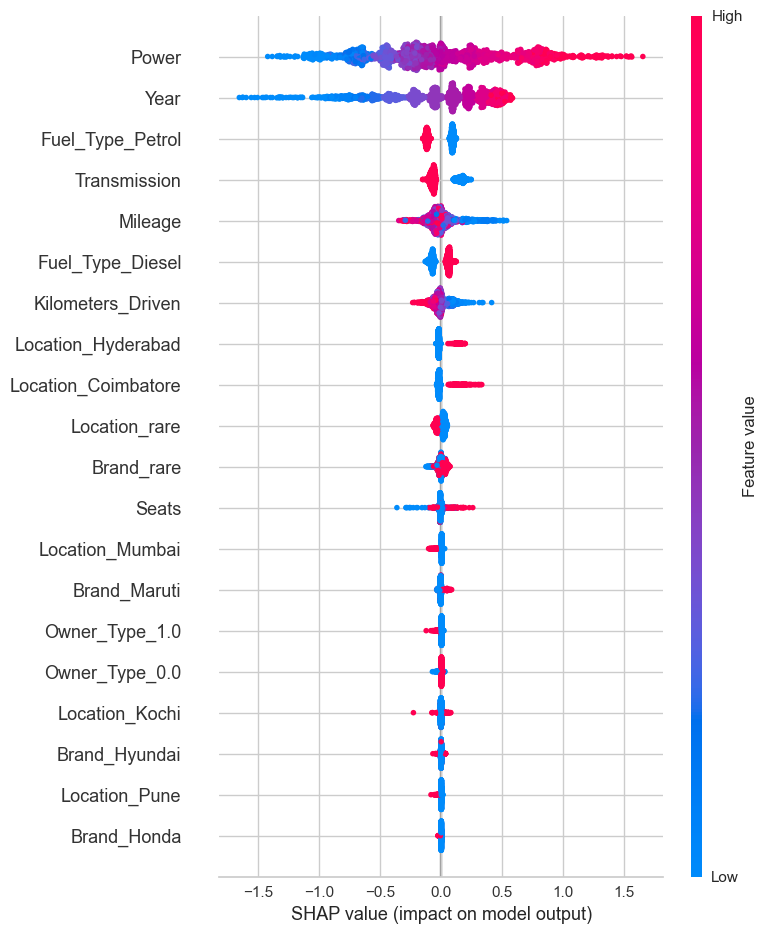

In [70]:
interpret_model(cb, plot = 'summary')

In [72]:
interpret_model(cb, plot='pdp', feature='Power')


Test with best model

In [65]:
new_data = unseen_test.copy()
new_data.drop('Price (INR Lakhs)', axis=1, inplace=True)
new_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,Maruti
6018,Hyderabad,2011,47000,Diesel,Manual,First,25.44,936.0,57.6,5.0,Chevrolet


In [66]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,prediction_label
6014,Delhi,2014,27365,Diesel,Manual,First,28.400000,1248.0,74.000000,5.0,Maruti,495000.000000
6015,Jaipur,2015,100000,Diesel,Manual,First,24.400000,1120.0,71.000000,5.0,Hyundai,388981.325243
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.000000,2498.0,112.000000,8.0,Mahindra,450000.000000
6017,Kolkata,2013,46000,Petrol,Manual,First,18.900000,998.0,67.099998,5.0,Maruti,265000.000000
6018,Hyderabad,2011,47000,Diesel,Manual,First,25.440001,936.0,57.599998,5.0,Chevrolet,270000.000000


In [68]:
unseen_test['Price (INR Lakhs)']

6014    475000.0
6015    400000.0
6016    290000.0
6017    265000.0
6018    250000.0
Name: Price (INR Lakhs), dtype: float64

# Save the pipeline

can compare and see that most predictions except the 3rd one is very close

In [61]:
save_model(best, 'best_car_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                            random_state=123)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                              'Mileage', 'Engine', 'Power',
                                              'Seats'],
                                     transformer=SimpleImputer())...
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('transformation',
                  TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                     random_state=123))),
                 ('norma

In [62]:
# load pipeline
loaded_best_pipeline = load_model('best_car_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\User\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                           random_state=123)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                             'Mileage', 'Engine', 'Power...
                 TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                ('transformation',
                 TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                    random_state=123))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x00000220FD0BA150>)])

# Save the best model

In [74]:
final_best = finalize_model(best)

2025/02/26 01:32:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [76]:
# Assuming 'model' is your trained model and 'X' is a sample input
input_example = X_transformed.iloc[:5]  # Use the first 5 rows of your input data as an example

mlflow.sklearn.log_model(
    final_best,
    "model",
    input_example=input_example,
    signature=mlflow.models.infer_signature(X_transformed, final_best.predict(X_transformed))
)

KeyError: "['Engine'] not in index"

In [75]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                           random_state=123)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                             'Mileage', 'Engine', 'Power',
                                             'Seats'],
                                    transformer=SimpleImputer())...
                 TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                ('transformation',
                 TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                    random_state=123))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x00000220FDF55950>)])

In [ ]:
save_model(best, 'my_first_model')